## Predicting if a project would be successfully funded

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
projects = pd.DataFrame.from_csv('opendata_projects.csv', index_col=None)

In [4]:
projects.head()

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,students_reached,total_donations,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration
0,7342bd01a2a7725ce033a179d22e382d,5c43ef5eac0f5857c266baa1ccfa3d3f,9e72d6f2f1e9367b578b6479aa5852b7,3.600097e+11,40.688454,-73.910432,Brooklyn,NY,11207,urban,...,0,251,1,f,f,completed,2002-09-13 00:00:00,2002-09-23 00:00:00,2003-01-27 00:00:00,2003-12-31 00:00:00
1,b56b502d25666e29550d107bf7e17910,57426949b47700ccf62098e1e9b0220c,4a06a328dd87bd29892d73310052f45f,3.600077e+11,40.770233,-73.950760,New York,NY,10075,NaN,...,0,125,1,f,f,completed,2002-09-16 00:00:00,2002-09-19 00:00:00,2002-12-19 00:00:00,2003-12-31 00:00:00
2,3a88a47f97bd0c9b7c6a745bcd831ce3,7a20087fac86232883537cab45c0a6c9,66d08b506d2f3c30dec9e6fdb03cc279,3.600122e+11,40.729763,-73.816925,Flushing,NY,11367,urban,...,0,2110,1,f,f,completed,2002-09-17 00:00:00,2003-03-17 00:00:00,2004-06-14 00:00:00,2003-12-31 00:00:00
3,0b8a4f8eb1822ab6dd5cd9ffb918ece3,e5d28482308e2007992ae8b358b31bce,9bc7d4d92193a453669b6e2a56128e87,3.600077e+11,40.701778,-74.011840,New York,NY,10004,urban,...,0,1241,1,f,f,completed,2002-09-17 00:00:00,2002-09-17 00:00:00,2003-12-18 00:00:00,2003-12-31 00:00:00
4,45235cb116b3b35cd86d1c3a63961d7d,214d75bd0e6ce3e7085278ddd8f26daa,f7f12dee0009e6f9afa301bcca9d5070,NaN,40.815018,-73.856094,Bronx,NY,10473,urban,...,0,83,1,f,f,completed,2002-09-17 00:00:00,2002-09-17 00:00:00,2004-01-28 00:00:00,2003-12-31 00:00:00


In [5]:
projects.funding_status.unique()

array(['completed', 'expired', 'reallocated', 'live'], dtype=object)

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
proj = projects.apply(le.fit_transform)

C:\Users\mjanyavula\AppData\Local\Continuum\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [7]:
proj.head()

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,students_reached,total_donations,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration
0,396045,116177,40132,36170,43071,57893,1010,35,1610,3,...,0,251,1,0,0,0,0,4,30,163
1,622792,109818,18893,35354,44160,57443,6112,35,1469,0,...,0,125,1,0,0,0,1,2,21,163
2,201387,153617,26128,36594,43640,58493,2930,35,1655,3,...,0,2110,1,0,0,0,2,74,207,163
3,39781,289467,39481,35389,43275,56992,6112,35,1436,3,...,0,1241,1,0,0,0,2,1,111,163
4,237629,41927,62855,66378,44571,58325,997,35,1509,3,...,0,83,1,0,0,0,2,1,127,163


In [8]:
proj = proj[proj.total_price_including_optional_support > 0]
projects = projects[projects.total_price_including_optional_support > 0]

In [9]:
# Categorical features
# Using OnHotEncode for categorical features
enc = preprocessing.OneHotEncoder()
a = enc.fit_transform(proj[['school_metro','primary_focus_subject','school_state','poverty_level','grade_level','resource_type']]).toarray()

In [10]:
# Boolean features
b = proj.as_matrix([['school_charter','school_magnet','school_year_round','school_nlns','school_kipp','school_charter_ready_promise',
                     'eligible_double_your_impact_match','eligible_almost_home_match','teacher_teach_for_america',
                    'teacher_ny_teaching_fellow']])

In [11]:
# Numerical feature
z = projects.as_matrix([['total_price_including_optional_support']])

In [12]:
## Concatenate all features to use as input to model
c = np.concatenate((a,b,z),axis=1)

In [13]:
c

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   2.79270000e+02],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.52440000e+02],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   2.23780000e+03],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.14972000e+03],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   7.29760000e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   9.67520000e+02]])

In [14]:
pd.DataFrame(c).head()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,279.27
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,152.44
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2237.80
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1376.83
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,101.22


In [15]:
#proj_input = proj[['school_charter','school_magnet','school_year_round','school_nlns','school_kipp','school_charter_ready_promise']]
proj_input = c
proj_output = projects['funding_status']
#proj_input = proj_input.replace('f',0).replace('t',1)


In [86]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(proj_input,proj_output)

In [87]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2 = clf2.fit(proj_input,proj_output)

In [90]:
projects['predicted_by_clf1'] = clf1.predict(proj_input)
projects['predicted_by_clf2'] = clf2.predict(proj_input)

In [107]:
projects[projects.funding_status == 'expired'][['funding_status','predicted_by_clf1','predicted_by_clf2','total_price_including_optional_support']].head()

,funding_status,predicted_by_clf1,predicted_by_clf2,total_price_including_optional_support
159,expired,expired,expired,148.17
160,expired,expired,expired,1036.59
211,expired,expired,expired,617.01
506,expired,expired,expired,585.79
507,expired,expired,expired,346.22


In [104]:
len(projects[projects.funding_status == 'expired'])

253184

In [338]:
a = pd.DataFrame(clf1.predict(proj_input))

In [106]:
clf1.predict(proj_input)

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [427]:
tree.export_graphviz(clf1,out_file='clf1_4.dot')     

In [105]:
proj['total_price_including_optional_support'].head()

0     13695
1      1713
2    120803
3     98050
4       236
Name: total_price_including_optional_support, dtype: int64

## Evaluating models with different parameters

**Functions from CS109**

In [16]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [17]:
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Generic classification and optimization functions from last lab
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# clf - original classifier
# parameters - grid to search over
# X - usually your training X matrix
# y - usually your training y 
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    best = gs.best_estimator_
    return best

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Important parameters
# indf - Input dataframe
# featurenames - vector of names of predictors
# targetname - name of column you want to predict (e.g. 0 or 1, 'M' or 'F', 
#              'yes' or 'no')
# target1val - particular value you want to have as a 1 in the target
# mask - boolean vector indicating test set (~mask is training set)
# reuse_split - dictionary that contains traning and testing dataframes 
#              (we'll use this to test different classifiers on the same 
#              test-train splits)
# score_func - we've used the accuracy as a way of scoring algorithms but 
#              this can be more general later on
# n_folds - Number of folds for cross validation ()
# n_jobs - used for parallelization
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    #subdf=indf[featurenames]
    X=featurenames#subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #
# Plot tree containing only two covariates
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - #

from matplotlib.colors import ListedColormap
# cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    # Create a meshgrid as our test data
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    # Re-cast every coordinate in the meshgrid as a 2D point
    Xplot= np.c_[xx.ravel(), yy.ravel()]


    # Predict the class
    Z = clfTree1.predict( Xplot )

    # Re-shape the results
    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    # Overlay training samples
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    # and testing points
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)

In [18]:
len(proj)

878547

In [19]:
projects[projects.total_price_including_optional_support > 0].head()

,_projectid,_teacher_acctid,_schoolid,school_ncesid,school_latitude,school_longitude,school_city,school_state,school_zip,school_metro,...,students_reached,total_donations,num_donors,eligible_double_your_impact_match,eligible_almost_home_match,funding_status,date_posted,date_completed,date_thank_you_packet_mailed,date_expiration
0,7342bd01a2a7725ce033a179d22e382d,5c43ef5eac0f5857c266baa1ccfa3d3f,9e72d6f2f1e9367b578b6479aa5852b7,3.600097e+11,40.688454,-73.910432,Brooklyn,NY,11207,urban,...,0,251,1,f,f,completed,2002-09-13 00:00:00,2002-09-23 00:00:00,2003-01-27 00:00:00,2003-12-31 00:00:00
1,b56b502d25666e29550d107bf7e17910,57426949b47700ccf62098e1e9b0220c,4a06a328dd87bd29892d73310052f45f,3.600077e+11,40.770233,-73.950760,New York,NY,10075,NaN,...,0,125,1,f,f,completed,2002-09-16 00:00:00,2002-09-19 00:00:00,2002-12-19 00:00:00,2003-12-31 00:00:00
2,3a88a47f97bd0c9b7c6a745bcd831ce3,7a20087fac86232883537cab45c0a6c9,66d08b506d2f3c30dec9e6fdb03cc279,3.600122e+11,40.729763,-73.816925,Flushing,NY,11367,urban,...,0,2110,1,f,f,completed,2002-09-17 00:00:00,2003-03-17 00:00:00,2004-06-14 00:00:00,2003-12-31 00:00:00
3,0b8a4f8eb1822ab6dd5cd9ffb918ece3,e5d28482308e2007992ae8b358b31bce,9bc7d4d92193a453669b6e2a56128e87,3.600077e+11,40.701778,-74.011840,New York,NY,10004,urban,...,0,1241,1,f,f,completed,2002-09-17 00:00:00,2002-09-17 00:00:00,2003-12-18 00:00:00,2003-12-31 00:00:00
4,45235cb116b3b35cd86d1c3a63961d7d,214d75bd0e6ce3e7085278ddd8f26daa,f7f12dee0009e6f9afa301bcca9d5070,NaN,40.815018,-73.856094,Bronx,NY,10473,urban,...,0,83,1,f,f,completed,2002-09-17 00:00:00,2002-09-17 00:00:00,2004-01-28 00:00:00,2003-12-31 00:00:00


In [20]:
proj['total_price_including_optional_support'].head()

0     13695
1      1713
2    120803
3     98050
4       236
Name: total_price_including_optional_support, dtype: int64

In [21]:
# Create test/train mask
itrain, itest = train_test_split(xrange(proj.shape[0]), train_size=0.60)
mask=np.ones(proj.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [22]:
print "% Project Success in training data:", np.mean(proj.funding_status[mask])
print "% Project Success in test data:", np.mean(proj.funding_status[~mask])

% Project Success in training data: 0.372438952209
% Project Success in test data: 0.370970266263


In [75]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf,Xtrain_dt,ytrain_dt,Xtest_dt,ytest_dt = do_classify(clf,parameters,projects,c,'funding_status','completed',mask=mask,
                                           n_jobs = 4,score_func = 'f1')

C:\Users\daedbuser\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
BEST {'max_depth': None, 'min_samples_leaf': 10} 0.760572890619 [mean: 0.72651, std: 0.01074, params: {'max_depth': None, 'min_samples_leaf': 1}, mean: 0.70354, std: 0.01309, params: {'max_depth': None, 'min_samples_leaf': 2}, mean: 0.72857, std: 0.01319, params: {'max_depth': None, 'min_samples_leaf': 3}, mean: 0.72411, std: 0.01431, params: {'max_depth': None, 'min_samples_leaf': 4}, mean: 0.74156, std: 0.01447, params: {'max_depth': None, 'min_samples_leaf': 5}, mean: 0.73975, std: 0.01576, params: {'max_depth': None, 'min_samples_leaf': 6}, mean: 0.75191, std: 0.01521, params: {'max_depth': None, 'min_samples_leaf': 7}, mean: 0.75208, std: 0.01505, params: {'max_depth': None, 'min_samples_leaf': 8}, mean: 0.76035, std: 0.01481, params: {'max_depth': None, 'min_samples_leaf': 9}, mean: 0.76057, std: 0.01544, params: {'max_depth': None, 'min_samples_leaf': 10}]
############# based on standard predict ################
Accuracy on training data: 0.78
Accuracy on test data:  

In [93]:
# Depth of a decision tree
clf.tree_.max_depth

63L

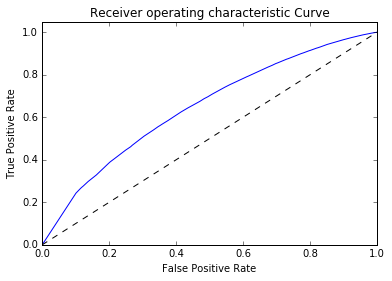

Area under ROC:  0.646783504592
Precision, Recall, Fscore:


(array([ 0.45238015,  0.74395553]),
 array([ 0.38430248,  0.79362195]),
 array([ 0.41557171,  0.76798659]),
 array([104972, 236624], dtype=int64))

In [125]:
# Plot of a ROC curve for a specific class
y_score_dt = pd.DataFrame(clf.predict_proba(Xtest_dt))[1]
import sklearn.metrics as metric
fpr,tpr,thresholds = metric.roc_curve(ytest_dt,y_score_dt)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

print 'Area under ROC: ',metric.roc_auc_score(ytest_dt,y_score_dt)
print 'Precision, Recall, Fscore:'
metric.precision_recall_fscore_support(ytest,clf.predict(Xtest))

In [106]:
from sklearn.ensemble import RandomForestClassifier
clfForest = RandomForestClassifier()

#parameters = {"n_estimators": range(1, 20)}
parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       projects, c,'funding_status', 'completed', mask=mask, 
                                                       n_jobs = 4, score_func='f1')

C:\Users\daedbuser\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
BEST {'n_estimators': 19} 0.771733326461 [mean: 0.72837, std: 0.01082, params: {'n_estimators': 1}, mean: 0.65566, std: 0.02030, params: {'n_estimators': 2}, mean: 0.75098, std: 0.01156, params: {'n_estimators': 3}, mean: 0.71589, std: 0.01647, params: {'n_estimators': 4}, mean: 0.75975, std: 0.01228, params: {'n_estimators': 5}, mean: 0.73805, std: 0.01574, params: {'n_estimators': 6}, mean: 0.76330, std: 0.01190, params: {'n_estimators': 7}, mean: 0.74803, std: 0.01468, params: {'n_estimators': 8}, mean: 0.76688, std: 0.01204, params: {'n_estimators': 9}, mean: 0.75406, std: 0.01369, params: {'n_estimators': 10}, mean: 0.76851, std: 0.01261, params: {'n_estimators': 11}, mean: 0.75834, std: 0.01340, params: {'n_estimators': 12}, mean: 0.76980, std: 0.01196, params: {'n_estimators': 13}, mean: 0.76071, std: 0.01289, params: {'n_estimators': 14}, mean: 0.76998, std: 0.01179, params: {'n_estimators': 15}, mean: 0.76303, std: 0.01254, params: {'n_estimators': 16}, mean: 0.7710

In [107]:
# Depths of decision tress inside random forest classifier
[estimator.tree_.max_depth for estimator in clfForest.estimators_]

[95L,
 96L,
 95L,
 96L,
 92L,
 98L,
 94L,
 98L,
 92L,
 104L,
 103L,
 87L,
 90L,
 98L,
 92L,
 97L,
 105L,
 100L,
 95L]

In [94]:
print len(proj)
print len(proj[proj.funding_status == 1])
print len(proj[proj.funding_status == 0])

853988
253184
592675


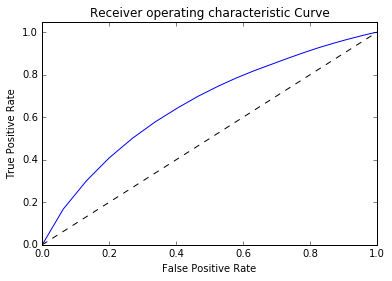

Area under ROC:  0.660243454938
Precision, Recall, Fscore:


(array([ 0.47330778,  0.74484791]),
 array([ 0.36816484,  0.81825174]),
 array([ 0.41416745,  0.77982629]),
 array([104972, 236624], dtype=int64))

In [123]:
# Plot of a ROC curve for a specific class
y_score = pd.DataFrame(clfForest.predict_proba(Xtest))[1]
import sklearn.metrics as metric
fpr,tpr,thresholds = metric.roc_curve(ytest,y_score)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

print 'Area under ROC: ',metric.roc_auc_score(ytest,y_score)
print 'Precision, Recall, Fscore:'
metric.precision_recall_fscore_support(ytest,clfForest.predict(Xtest))

In [124]:
print 'Area under ROC: ',metric.roc_auc_score(ytest,y_score,average ='macro')

Area under ROC:  0.660243454938


In [72]:
ytest

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
clfForest.predict_proba(Xtest)

array([[ 0.26315789,  0.73684211],
       [ 0.94736842,  0.05263158],
       [ 0.36842105,  0.63157895],
       ..., 
       [ 0.84210526,  0.15789474],
       [ 0.73684211,  0.26315789],
       [ 0.36842105,  0.63157895]])

In [117]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
clfLog = LogisticRegression()

#parameters = {"multi_class": ['ovr'],"solver":['newton-cg','lbfgs','liblinear','sag']}
parameters = {"multi_class": ['ovr']}
clfLog, Xtrain, ytrain, Xtest, ytest = do_classify(clfLog, parameters, 
                                                       projects, c,'funding_status', 'completed', mask=mask, 
                                                       n_jobs = 4, score_func='f1')

C:\Users\daedbuser\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


using mask
BEST {'multi_class': 'ovr'} 0.818100550379 [mean: 0.81810, std: 0.00578, params: {'multi_class': 'ovr'}]
############# based on standard predict ################
Accuracy on training data: 0.71
Accuracy on test data:     0.70
[[ 13423  91549]
 [  9508 227116]]
########################################################


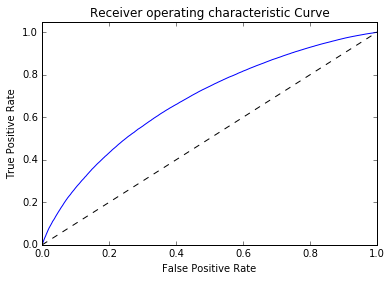

Area under ROC:  0.67928994684
Precision, Recall, Fscore:


(array([ 0.58536479,  0.71271084]),
 array([ 0.12787219,  0.95981811]),
 array([ 0.20989343,  0.81801008]),
 array([104972, 236624], dtype=int64))

In [122]:
# Plot of a ROC curve for a specific class
y_score = pd.DataFrame(clfLog.predict_proba(Xtest))[1]
import sklearn.metrics as metric
fpr,tpr,thresholds = metric.roc_curve(ytest,y_score)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Curve')
plt.legend(loc="lower right")
plt.show()

print 'Area under ROC: ',metric.roc_auc_score(ytest,y_score)
print 'Precision, Recall, Fscore:'
metric.precision_recall_fscore_support(ytest,clfLog.predict(Xtest))

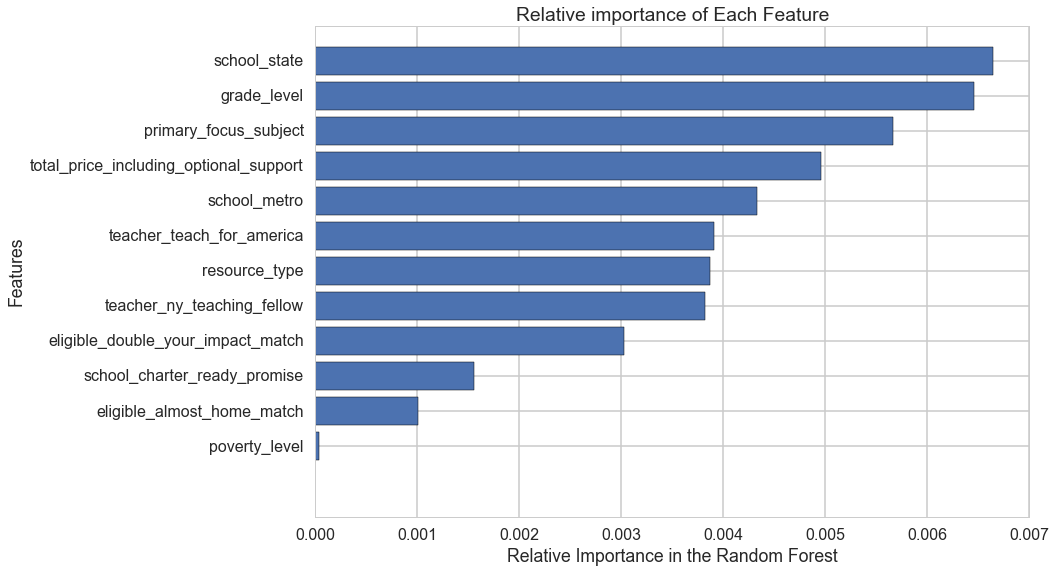

In [55]:
# TODO: Need to check, not sure
importance_list = clfForest.feature_importances_
name_list = proj[['total_price_including_optional_support','school_metro','primary_focus_subject','school_state','poverty_level','grade_level','resource_type',
                 'school_charter_ready_promise','eligible_double_your_impact_match','eligible_almost_home_match','teacher_teach_for_america','teacher_ny_teaching_fellow']].columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [56]:
from sklearn.ensemble import AdaBoostClassifier
clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       proj, c,'funding_status', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'n_estimators': 54} 0.277366897252 [mean: 0.17057, std: 0.06072, params: {'n_estimators': 10}, mean: 0.17425, std: 0.05650, params: {'n_estimators': 11}, mean: 0.16147, std: 0.04943, params: {'n_estimators': 12}, mean: 0.19578, std: 0.05446, params: {'n_estimators': 13}, mean: 0.16635, std: 0.03907, params: {'n_estimators': 14}, mean: 0.24163, std: 0.03993, params: {'n_estimators': 15}, mean: 0.19067, std: 0.07721, params: {'n_estimators': 16}, mean: 0.25115, std: 0.06936, params: {'n_estimators': 17}, mean: 0.20794, std: 0.03009, params: {'n_estimators': 18}, mean: 0.24373, std: 0.06432, params: {'n_estimators': 19}, mean: 0.21960, std: 0.05888, params: {'n_estimators': 20}, mean: 0.24783, std: 0.06627, params: {'n_estimators': 21}, mean: 0.21129, std: 0.08625, params: {'n_estimators': 22}, mean: 0.21607, std: 0.06902, params: {'n_estimators': 23}, mean: 0.25217, std: 0.06494, params: {'n_estimators': 24}, mean: 0.22186, std: 0.08220, params: {'n_estimators': 25}, mea

C:\Users\mjanyavula\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:46: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       proj, c,'funding_status', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

In [ ]:
from sklearn import svm
clf = svm.SVC()

parameters = {"C": [1,2,3,0.5]}
clf,Xtrain,ytrain,Xtest,ytest = do_classify(clf,parameters,proj,c,'funding_status',1,mask=mask,
                                           n_jobs = 4,score_func = 'f1')